# Learning and Development: Logistic Regression with `scikit-learn`

- **Author:** Sakthi Santhosh
- **Created on:** 01/03/2024

Logistic regression is a statistical method used for binary classification tasks, where the goal is to predict the probability of a categorical outcome (usually coded as 0 or 1). Despite its name, it's a classification algorithm rather than a regression algorithm. It works by fitting a logistic curve to the data, which allows it to model the relationship between one or more independent variables and the probability of the binary outcome. It's widely used in various fields such as healthcare, finance, and marketing for predicting outcomes like whether a customer will buy a product or whether a patient has a particular disease.

Logistic regression is a statistical method used for binary classification tasks, where the outcome variable is categorical with two levels (e.g., yes/no, true/false, 0/1). It estimates the probability that a given input belongs to a particular category.

Here's how logistic regression works mathematically:

1. **Linear Combination:**
   Given a set of input features $x_{1}, x_{2}, \ldots, x_{n}$, logistic regression calculates a linear combination of these features weighted by coefficients (just as linear regression does):
   $$h_{\beta}(X) = \beta_0 + \beta1_{1}X_{1} + \beta_{2}X_{2} + \ldots + \beta_{n}X_{n}$$
   where $h_{\beta}(X)$ is the linear predictor, and $\beta_{0}, \beta_{1}, \ldots, \beta_{n}$ are the coefficients (also known as weights or parameters) to be learned from the training data.
3. **Logistic Function:**
   The linear combination $h_{\beta}(X)$ is then passed through the logistic function (also called the sigmoid function) to squash the output between 0 and 1, representing probabilities:
   $$\hat{h_{\beta}(X)} = \frac{1}{1 + e^{-h_{\beta}(X)}}$$
   The logistic function gives the probability distribution of data as output. Now, this must be passed through a loss model to calculate the loss between the observed probability distribution and the predicted probability distribution.
5. **Loss Function:**
   Logistic regression typically uses the cross-entropy loss function to measure the difference between the predicted probabilities and the actual labels. It is mathematically represented as follows:
   $$\text{loss}(Y, h_{\beta}(X)) = -\left[Y \times \log(h_{\beta}(X)) - (1 - Y) \times log(1 - h_{\beta}(X)) \right]$$
7. **Optimization:**
   The goal of logistic regression is to minimize the loss function by adjusting the coefficients (weights) using optimization algorithms such as gradient descent.
8. **Prediction:**
   Once the model is trained, it can be used to predict the probability of new inputs belonging to the positive class using the learned coefficients and the logistic function.

Overall, logistic regression estimates the probability that a given input belongs to a certain class based on its features, making it a powerful tool for binary classification tasks.

## Importing Modules

In [1]:
from matplotlib import font_manager, rcParams
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor
import seaborn as sns

%matplotlib inline

In [2]:
!mkdir -p ./assets/
!wget -q -O "./assets/FreeMonoBold.ttf" "https://github.com/sakthisanthosh010303/ctn-datasets/raw/main/FreeMonoBold.ttf"
!wget -q -O "./assets/weather_australia.csv" "https://raw.githubusercontent.com/sakthisanthosh010303/ctn-datasets/main/weather_australia.csv"

font_manager.fontManager.addfont("./assets/FreeMonoBold.ttf")
rcParams["font.family"] = "FreeMono"

In [3]:
data_frame = pd.read_csv("./assets/weather_australia.csv")

print(data_frame.shape)
data_frame

(145460, 23)


,date,location,min_temp,max_temp,rainfall,evaporation,sunshine,windgust_dir,windgust_speed,wind_dir_9am,...,humidity_9am,humidity_3pm,pressure_9am,pressure_3pm,cloud_9am,cloud_3pm,temp_9am,temp_3pm,rain_today,rain_tomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


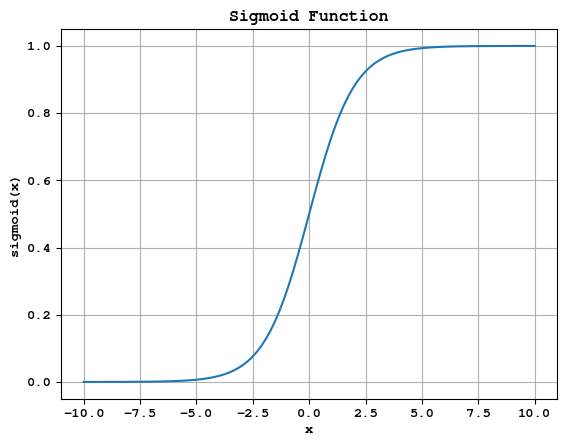

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)

plt.title("Sigmoid Function")
plt.xlabel('x'); plt.ylabel("sigmoid(x)")

plt.grid(True)
plt.show()

## Exploratory Data Analysis

### Occurence of Each Region in Dataset

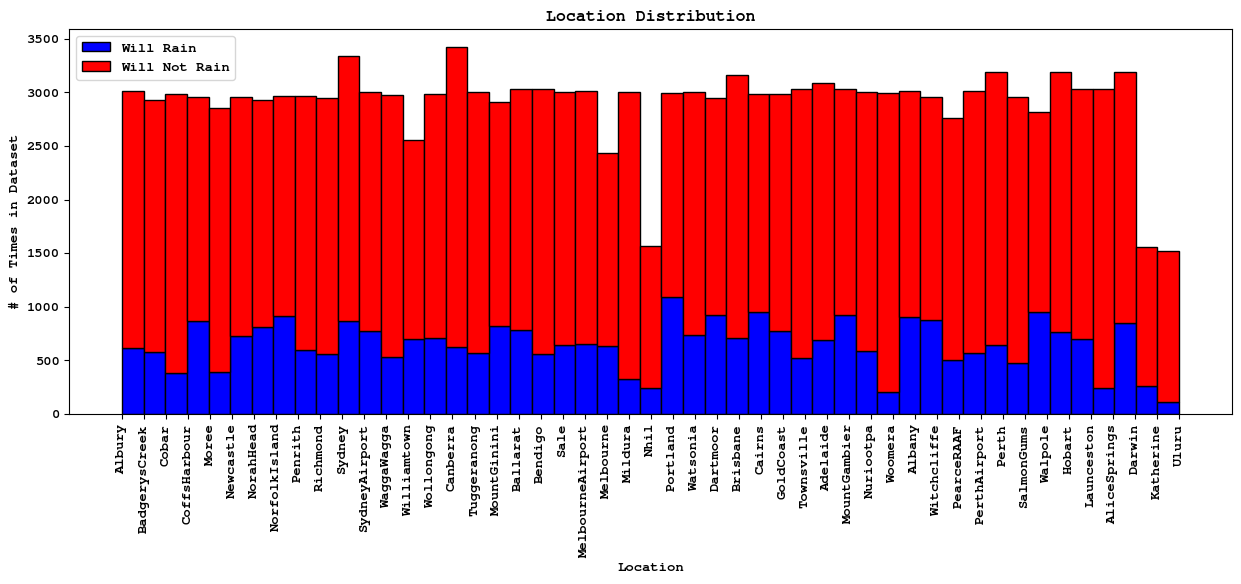

In [5]:
plt.figure(figsize=(15, 5))
plt.hist(
    [
        data_frame[data_frame["rain_tomorrow"] == "Yes"]["location"],
        data_frame[data_frame["rain_tomorrow"] == "No"]["location"],
    ],
    bins=49,
    edgecolor="black",
    stacked=True,
    color=["blue", "red"],
    label=["Will Rain", "Will Not Rain"]
)

plt.title("Location Distribution")
plt.xlabel("Location"); plt.ylabel("# of Times in Dataset");

plt.xticks(rotation=90)
plt.legend()
plt.show()

## Imputation of Dataset

Imputation refers to the process of replacing missing data with substituted values. This is important because many machine learning algorithms cannot handle missing data, and imputation helps to ensure that the dataset is complete before training the model. Imputation techniques can vary, ranging from simple methods like replacing missing values with the mean or median of the feature, to more complex approaches such as using regression models to predict missing values based on other features in the dataset. The choice of imputation technique depends on the nature of the data and the specific requirements of the machine learning task.

### Selecting a Strategy

The choice between using the median and the mean for imputation depends on the nature of the data and the presence of outliers:

1. **Mean Imputation:**
   - Use mean imputation when the data is normally distributed or symmetrically distributed without significant outliers.
   - It preserves the overall mean of the dataset and does not distort the distribution of the data.
2. **Median Imputation:**
   - Use median imputation when the data is skewed or contains outliers.
   - The median is less sensitive to outliers compared to the mean, making it a better choice when the distribution is not normal or when there are extreme values.

Let us check for the number of NaN values in each numeric column as follows:

In [6]:
input_cols, target_col = list(data_frame.columns)[1:-1], "rain_tomorrow"
numeric_cols, categorical_cols = (
    data_frame[input_cols].select_dtypes(include=np.number).columns.tolist(),
    data_frame[input_cols].select_dtypes("object").columns.tolist(),
)

#print(input_cols, target_col, sep='\n', end="\n\n")
#print(numeric_cols, categorical_cols, sep='\n')

In [7]:
data_frame[data_frame.columns].isna().sum()

date                  0
location              0
min_temp           1485
max_temp           1261
rainfall           3261
evaporation       62790
sunshine          69835
windgust_dir      10326
windgust_speed    10263
wind_dir_9am      10566
wind_dir_3pm       4228
wind_speed_9am     1767
wind_speed_3pm     3062
humidity_9am       2654
humidity_3pm       4507
pressure_9am      15065
pressure_3pm      15028
cloud_9am         55888
cloud_3pm         59358
temp_9am           1767
temp_3pm           3609
rain_today         3261
rain_tomorrow      3267
dtype: int64

**Note:** The output/target contains NaN values, which are ignored for now because I'm a noob in ML. I'll fix it in the future.

In [8]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")

imputer.fit(data_frame[numeric_cols])

data_frame[numeric_cols] = imputer.transform(data_frame[numeric_cols])

print(imputer.statistics_)
data_frame.head()

[  12.19403438   23.22134828    2.36091815    5.46823152    7.61117752
   40.03523007   14.04342591   18.66265678   68.88083134   51.53911588
 1017.6499398  1015.25588883    4.44746126    4.50993008   16.99063142
   21.68339032]


,date,location,min_temp,max_temp,rainfall,evaporation,sunshine,windgust_dir,windgust_speed,wind_dir_9am,...,humidity_9am,humidity_3pm,pressure_9am,pressure_3pm,cloud_9am,cloud_3pm,temp_9am,temp_3pm,rain_today,rain_tomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [9]:
data_frame[data_frame.columns].isna().sum()

date                  0
location              0
min_temp              0
max_temp              0
rainfall              0
evaporation           0
sunshine              0
windgust_dir      10326
windgust_speed        0
wind_dir_9am      10566
wind_dir_3pm       4228
wind_speed_9am        0
wind_speed_3pm        0
humidity_9am          0
humidity_3pm          0
pressure_9am          0
pressure_3pm          0
cloud_9am             0
cloud_3pm             0
temp_9am              0
temp_3pm              0
rain_today         3261
rain_tomorrow      3267
dtype: int64

As seen above, we've imputed `NaN` data for all numeric columns. Let us impute values for categorical data after encoding it.

## Normalization/Standardization/Scaling of Data

Scaling numeric data that are in different ranges before passing them to a model is essential for several reasons:

1. **Avoiding Bias in Features:** Features with larger scales can disproportionately influence the model's learning process, leading it to give more weight to those features. Scaling ensures that all features contribute equally to the model's decision-making process.
2. **Improving Convergence:** Many machine learning algorithms, such as gradient descent-based optimization algorithms, converge faster when features are on similar scales. Scaling prevents the algorithm from taking longer to reach convergence due to disparate feature scales.
3. **Enhancing Interpretability:** Scaling makes it easier to interpret the coefficients or feature importance scores generated by the model. Without scaling, it might be challenging to determine the relative importance of different features.
4. **Improving Model Performance:** Scaling can lead to better performance of certain machine learning algorithms, particularly distance-based algorithms like k-nearest neighbors (KNN) or support vector machines (SVM), where distances between data points are computed.

Overall, scaling helps ensure that the model can learn effectively from the data without being biased or adversely affected by differences in feature scales. Common scaling techniques include Min-max scaling, Standard scaling, and Robust scaling.

In [10]:
data_frame[numeric_cols].describe()

,min_temp,max_temp,rainfall,evaporation,sunshine,windgust_speed,wind_speed_9am,wind_speed_3pm,humidity_9am,humidity_3pm,pressure_9am,pressure_3pm,cloud_9am,cloud_3pm,temp_9am,temp_3pm
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.649940,1015.255889,4.447461,4.509930,16.990631,21.683390
std,6.365750,7.088124,8.382488,3.161541,2.729486,13.118253,8.861059,8.716581,18.854765,20.471189,6.728467,6.663973,2.265604,2.092954,6.449221,6.850057
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.700000,18.000000,0.000000,4.000000,7.611178,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000
50%,12.100000,22.700000,0.000000,5.468232,7.611178,39.000000,13.000000,18.662657,69.000000,51.539116,1017.649940,1015.255889,4.447461,4.509930,16.800000,21.400000
75%,16.800000,28.200000,1.000000,5.468232,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(data_frame[numeric_cols])

data_frame[numeric_cols] = scaler.transform(data_frame[numeric_cols])

data_frame[numeric_cols]

,min_temp,max_temp,rainfall,evaporation,sunshine,windgust_speed,wind_speed_9am,wind_speed_3pm,humidity_9am,humidity_3pm,pressure_9am,pressure_3pm,cloud_9am,cloud_3pm,temp_9am,temp_3pm
0,0.516509,0.523629,0.001617,0.037712,0.524909,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.501103,0.508439,0.522073
1,0.375000,0.565217,0.000000,0.037712,0.524909,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.494162,0.501103,0.514768,0.570058
2,0.504717,0.576560,0.000000,0.037712,0.524909,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.494162,0.222222,0.594937,0.548944
3,0.417453,0.620038,0.000000,0.037712,0.524909,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.494162,0.501103,0.533755,0.612284
4,0.613208,0.701323,0.002695,0.037712,0.524909,0.271318,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0.266509,0.533081,0.000000,0.037712,0.524909,0.193798,0.100000,0.126437,0.51,0.24,0.728926,0.6912,0.494162,0.501103,0.364979,0.533589
145456,0.285377,0.568998,0.000000,0.037712,0.524909,0.124031,0.100000,0.103448,0.56,0.21,0.710744,0.6720,0.494162,0.501103,0.381857,0.573896
145457,0.327830,0.599244,0.000000,0.037712,0.524909,0.240310,0.069231,0.103448,0.53,0.24,0.669421,0.6352,0.494162,0.501103,0.415612,0.604607
145458,0.384434,0.601134,0.000000,0.037712,0.524909,0.170543,0.100000,0.080460,0.51,0.24,0.642975,0.6304,0.333333,0.222222,0.470464,0.602687


## Encoding Categorical Data

The `OneHotEncoder` is a transformer used for converting categorical variables into a one-hot encoded representation. 

- **`encoder = OneHotEncoder(sparse=False, handle_unknowns="ignore")`:** This line creates an instance of the `OneHotEncoder` class with two parameters:
  - **`sparse_output=False`:** This parameter specifies whether to return a sparse matrix or a dense array. When set to `False`, it returns a dense array.
  - **`handle_unknowns="ignore"`:** This parameter specifies how to handle unknown categories (categories that were not seen during fitting). Setting it to `"ignore"` means that unknown categories encountered during the transformation will be ignored instead of raising an error.

1. **Sparse Representation (`sparse_output` attribute):**
   - By default, the `sparse_output` attribute is set to `True`, meaning that the `transform` method returns a sparse matrix.
   - Sparse matrices are memory-efficient representations of matrices that primarily contain zeros. They only store non-zero elements and their indices, which can save a significant amount of memory, especially when dealing with large datasets with many categorical features.
   - However, if you prefer to have the one-hot encoded representation as a dense array, you can set `sparse_output=False`.
2. **Handling Unknown Categories (`handle_unknown` attribute):**
   - The `handle_unknown` attribute specifies how to handle categories that were not seen during the fitting stage (i.e., unknown categories) when transforming new data.
   - By default, `handle_unknown` is set to `"error"`, which raises an error when encountering unknown categories during transformation.
   - Setting `handle_unknown="ignore"` allows the transformer to ignore unknown categories and encode them as an all-zero vector.
   
   **Example:**
   ```python
   import numpy as np
   from sklearn.preprocessing import OneHotEncoder

   data_train = np.array(
       [['A', 'X'],
       ['B', 'Y']]
   )
   data_test = np.array(
       [['A', 'X'],
       ['C', 'Z']]
   )

   encoder = OneHotEncoder(handle_unknown="ignore")
   encoded_data_train = encoder.fit_transform(data_train)
   encoded_data_test = encoder.transform(data_test)
   ```
   
In this example, the unknown category 'C' encountered in the test data is ignored during transformation, resulting in an all-zero vector for the corresponding feature.

In [12]:
# Optional
data_frame["location"] = data_frame["location"].str.lower()
data_frame["rain_today"], data_frame["rain_tomorrow"] = data_frame["rain_today"].str.lower(), data_frame["rain_tomorrow"].str.lower()
data_frame["wind_dir_9am"], data_frame["wind_dir_3pm"] = data_frame["wind_dir_9am"].str.lower(), data_frame["wind_dir_3pm"].str.lower()
data_frame["windgust_dir"] = data_frame["windgust_dir"].str.lower()

data_frame.head()

,date,location,min_temp,max_temp,rainfall,evaporation,sunshine,windgust_dir,windgust_speed,wind_dir_9am,...,humidity_9am,humidity_3pm,pressure_9am,pressure_3pm,cloud_9am,cloud_3pm,temp_9am,temp_3pm,rain_today,rain_tomorrow
0,2008-12-01,albury,0.516509,0.523629,0.001617,0.037712,0.524909,w,0.294574,w,...,0.71,0.22,0.449587,0.4800,0.888889,0.501103,0.508439,0.522073,no,no
1,2008-12-02,albury,0.375000,0.565217,0.000000,0.037712,0.524909,wnw,0.294574,nnw,...,0.44,0.25,0.497521,0.4912,0.494162,0.501103,0.514768,0.570058,no,no
2,2008-12-03,albury,0.504717,0.576560,0.000000,0.037712,0.524909,wsw,0.310078,w,...,0.38,0.30,0.447934,0.5056,0.494162,0.222222,0.594937,0.548944,no,no
3,2008-12-04,albury,0.417453,0.620038,0.000000,0.037712,0.524909,ne,0.139535,se,...,0.45,0.16,0.613223,0.5712,0.494162,0.501103,0.533755,0.612284,no,no
4,2008-12-05,albury,0.613208,0.701323,0.002695,0.037712,0.524909,w,0.271318,ene,...,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,no,no


In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

encoder.fit(data_frame[categorical_cols])

encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

#encoder.categories_
data_frame[encoded_cols] = encoder.transform(data_frame[categorical_cols])
#print(encoded_cols)

In [14]:
data_frame.head()

,date,location,min_temp,max_temp,rainfall,evaporation,sunshine,windgust_dir,windgust_speed,wind_dir_9am,...,wind_dir_3pm_sse,wind_dir_3pm_ssw,wind_dir_3pm_sw,wind_dir_3pm_w,wind_dir_3pm_wnw,wind_dir_3pm_wsw,wind_dir_3pm_nan,rain_today_no,rain_today_yes,rain_today_nan
0,2008-12-01,albury,0.516509,0.523629,0.001617,0.037712,0.524909,w,0.294574,w,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2008-12-02,albury,0.375000,0.565217,0.000000,0.037712,0.524909,wnw,0.294574,nnw,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,2008-12-03,albury,0.504717,0.576560,0.000000,0.037712,0.524909,wsw,0.310078,w,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,2008-12-04,albury,0.417453,0.620038,0.000000,0.037712,0.524909,ne,0.139535,se,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2008-12-05,albury,0.613208,0.701323,0.002695,0.037712,0.524909,w,0.271318,ene,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Saving Processed Data to Disk

Parquet is a columnar storage format for storing data in a highly compressed and efficient manner. It organizes data into columns rather than rows, which improves query performance by minimizing the amount of data that needs to be read from disk. Parquet leverages various compression techniques to reduce storage space and supports nested data structures, making it suitable for complex data types commonly found in big data processing. Additionally, Parquet is designed for parallel processing and is compatible with various data processing frameworks such as Apache Spark, Hive, and Impala, making it a popular choice for storing and analyzing large datasets in distributed environments.

In [15]:
data_frame.to_parquet("./assets/processed_weather_australia.parquet")
#data_frame = pd.read_parquet("./assets/processed_weather_australia.parquet")

## Splitting Dataset

In machine learning, the training, validation, and testing sets are essential components of the model development process. Here's a brief explanation of each:

1. **Training Set:**
   - The training set is a subset of the dataset that is used to train the machine learning model.
   - It consists of input data (features) and corresponding target labels (the values the model is trying to predict).
   - The model learns patterns and relationships in the training data to make predictions.
2. **Validation Set:**
   - The validation set is another subset of the dataset that is used to tune the hyperparameters of the model and evaluate its performance during training.
   - After each iteration of training, the model's performance is evaluated on the validation set.
   - This helps in adjusting hyperparameters to improve the model's generalization performance without overfitting to the training data.
3. **Testing Set:**
   - The testing set is a separate subset of the dataset that is used to evaluate the final performance of the trained model.
   - It provides an unbiased estimate of the model's performance on unseen data.
   - The model is evaluated on the testing set only after the training process is complete and hyperparameters are tuned using the validation set.
   - The testing set helps to assess how well the model will generalize to new, unseen data in real-world applications.

Usually, the test dataset and the training dataset is given separately. If both are given, the take a 75:25 ratio of data for training and validation. Else, take 60:20:20 for training, validation and testing respectively.

In [16]:
from sklearn.model_selection import train_test_split

train_val_df, test_df = train_test_split(data_frame, test_size=0.2, random_state=12)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=12)

print(train_df.shape, val_df.shape, test_df.shape)

(87276, 126) (29092, 126) (29092, 126)


### Problem

Since we have a time-series data, we cannot pass the future date to the training data. When training a time-series model, we're essentially trying to predict future values based on past and present data. If we use future data points for training, the model would essentially be "cheating" by learning from information it wouldn't have at the time of prediction, leading to unrealistic performance metrics and poor generalization to new data. **Additionally, in real-world scenarios, future data points are typically not available at the time of prediction, so the model needs to rely on past and present information to make accurate forecasts.**

Hence, let's split the data in timely manner. Firstly, let us have a look at the distribution of data with year.

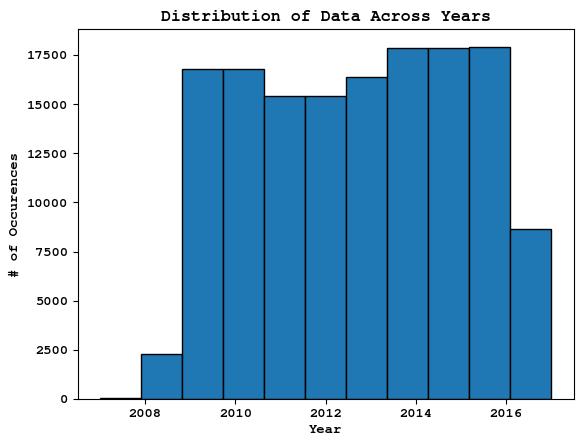

In [17]:
plt.hist(
    pd.to_datetime(data_frame["date"]).dt.year,
    bins=11,
    edgecolor="black"
)

plt.title("Distribution of Data Across Years")
plt.xlabel("Year"); plt.ylabel("# of Occurences")

plt.show()

From the above distribution of data across years, let us choose training set to be from 2007 to 2014, validation data from 2015 and test data from 2016 to 2017. Also, we eliminate the `date` field and the `rain_tomorrow` field from the input.

In [18]:
empty_output_rows = data_frame["rain_tomorrow"].isna().sum()

print(data_frame.shape, empty_output_rows, data_frame.shape[0] - empty_output_rows)
data_frame.dropna(subset=["rain_tomorrow"], inplace=True)
print(data_frame.shape)

(145460, 126) 3267 142193
(142193, 126)


In [19]:
year = pd.to_datetime(data_frame["date"]).dt.year
train_df, val_df, test_df = data_frame[year < 2015], data_frame[year == 2015], data_frame[year > 2015]

print(train_df.shape, val_df.shape, test_df.shape)
#print(numeric_cols, encoded_cols, sep='\n')

(98988, 126) (17231, 126) (25974, 126)


In [20]:
train_inputs, train_targets = train_df[numeric_cols + encoded_cols], train_df["rain_tomorrow"]
val_inputs, val_targets = val_df[numeric_cols + encoded_cols], val_df["rain_tomorrow"]
test_inputs, test_targets = test_df[numeric_cols + encoded_cols], test_df["rain_tomorrow"]

## Training the Model

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(train_inputs, train_targets)

LogisticRegression()

## Accuracy Metrics

In [22]:
from sklearn.metrics import accuracy_score

test_predictions = model.predict(test_inputs)

accuracy_score(test_targets, test_predictions)

0.8400708400708401

## Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a **classification model** (or "classifier") on a set of test data for which the true values are known. It allows visualization of the performance of an algorithm.

Here's a breakdown of its components:

1. **True Positive (TP)**: These are the cases where the model correctly predicted the positive class.
2. **True Negative (TN)**: These are the cases where the model correctly predicted the negative class.
3. **False Positive (FP)**: Also known as type-I error, these are the cases where the model incorrectly predicted the positive class when it was actually negative.
4. **False Negative (FN)**: Also known as type-II error, these are the cases where the model incorrectly predicted the negative class when it was actually positive.

From this matrix, various performance metrics can be derived, including:

1. **Accuracy**: The proportion of the total number of predictions that were correct (TP + TN) divided by the total number of predictions.
2. **Precision**: The proportion of true positive predictions out of all positive predictions made by the model (TP / (TP + FP)).
3. **Recall (or sensitivity)**: The proportion of true positive predictions out of all actual positive cases (TP / (TP + FN)).
4. **Specificity**: The proportion of true negative predictions out of all actual negative cases (TN / (TN + FP)).
5. **F1 Score**: The harmonic mean of precision and recall, which balances both metrics.

These metrics give insights into how well the model is performing and whether it's biased towards any particular class. Additionally, the confusion matrix can help identify which types of errors the model is making most frequently, allowing for targeted improvements. Let's break down the performance metrics using simpler terms:

1. **Accuracy**: Imagine you have a total of 100 predictions. Accuracy tells you how many of these predictions were correct out of the total. For example, if your model made 85 correct predictions out of 100, the accuracy would be 85%.
2. **Precision**: Precision focuses on the positive predictions made by your model. It tells you how many of the positive predictions were actually correct. For instance, if your model predicted there were 30 positive cases, but only 25 of them were true positives (correctly predicted), then the precision would be 25/30 = 83.33%.
3. **Recall (or Sensitivity)**: Recall looks at how well your model can find all the positive cases. It tells you the proportion of actual positive cases that were correctly identified by the model. For example, if there were actually 50 positive cases, but your model only identified 40 of them, then the recall would be 40/50 = 80%.
4. **Specificity**: Specificity is similar to recall but focuses on the negative cases. It tells you the proportion of actual negative cases that were correctly identified by the model. 
5. **F1 Score**: The F1 score combines both precision and recall into a single metric. It's useful when you want to balance both precision and recall. It's the harmonic mean of precision and recall.

These metrics provide different perspectives on the performance of your model. Accuracy gives an overall view, while precision and recall focus on specific aspects of the model's performance related to positive and negative predictions. Specificity complements recall by focusing on correctly identifying negative cases. The F1 score provides a balanced view by considering both precision and recall together.

In [23]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(test_targets, test_predictions, normalize="true")

matrix

array([[0.94587577, 0.05412423],
       [0.51631349, 0.48368651]])

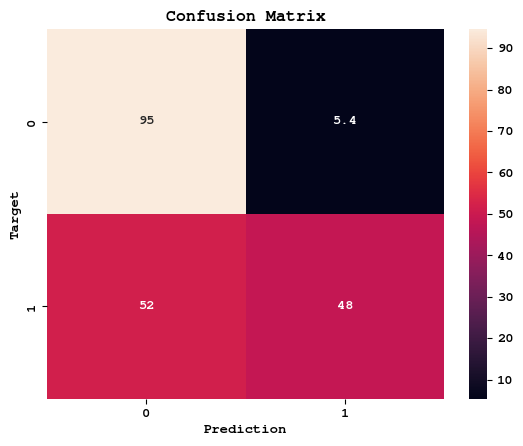

In [24]:
sns.heatmap(matrix * 100, annot=True)

plt.xlabel("Prediction"); plt.ylabel("Target")
plt.title("Confusion Matrix")

plt.show()

### Inference

The model can predict with an high accuracy on whether it'll not rain tomorrow, but performs poor in predicting whether it'll rain tomorrow. The model has less precision in determining the output.

## Predicting Against Random Model

Random models make predictions based on chance or randomness, without considering any input features. For example, a random model for binary classification would randomly assign labels to each instance with equal probability.

By comparing the performance of the logistic regression model with that of a random model, we can determine whether the logistic regression model is learning meaningful patterns from the data. If the logistic regression model significantly outperforms the random model, it suggests that the model is capturing useful information from the input features and making predictions based on that information.

In [25]:
accuracy_score(test_targets, np.random.choice(["no", "yes"], len(test_targets)))

0.498960498960499

### Inference

Since the prediction of the learning model is consistently greater than that of the random model, it indicates that your learning model is performing better than random chance. This suggests that your learning model is effectively capturing patterns or relationships in the data and making predictions based on those patterns.

Here are a few things you can infer from this:

1. **Model Effectiveness**: Your learning model is effective at learning from the input data and making predictions that are better than random guessing.

2. **Learning Signal**: The data likely contains meaningful patterns or relationships that your learning model is able to pick up on and utilize for making predictions.

3. **Potential Utility**: Since your learning model is performing better than random chance, it may have practical utility in real-world applications where accurate predictions are important.

## Predicting Against Dumb Model

Logistic regression is often compared to dumb models, like always predicting "no," as a baseline for performance evaluation. This comparison helps assess whether the logistic regression model is learning anything meaningful beyond just the most frequent outcome. If the logistic regression model performs significantly better than the dumb model, it suggests that it's capturing patterns in the data and making useful predictions. Conversely, if it performs similarly to the dumb model, it indicates that the model isn't learning effectively or that the data may not contain meaningful patterns for prediction. Thus, comparing logistic regression to dumb models serves as a simple yet effective method for gauging its predictive power and overall performance.

In [26]:
accuracy_score(test_targets, np.full(len(test_targets), "no"))

0.7710787710787711

### Inference

Since the learning model performs better than a dumb model that always predicts "no," it indicates that the model is learning meaningful patterns from the data and making useful predictions. This suggests that the model is capturing relevant information and providing insights that go beyond simply guessing the most frequent outcome. In other words, it demonstrates that the model is effective in distinguishing between different classes or making accurate predictions based on the input features. This improvement over the dumb model validates the usefulness and effectiveness of the model in solving the given task or problem.